In [4]:
# 데이터셋 불러오기
# Fashion_MNIST 데이터셋 불러오기 예제
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root = 'data', # 데이터가 저장되는 경로
    train = True, # 학습용/테스트용 데이터셋 여부 지정
    download = True, # root에 데이터가 없는 경우 인터넷에서 다운로드 할지 여부
    transform = ToTensor() # feature와 정답 변형 지정
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)


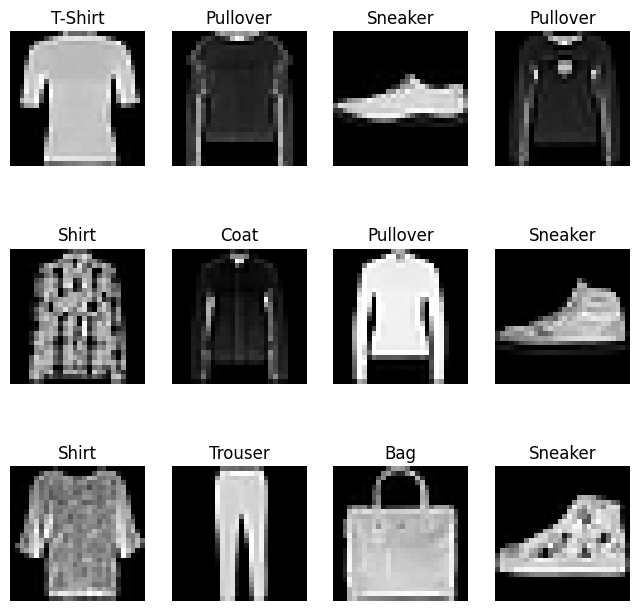

In [18]:
# 데이터셋을 순회하고 시각화하기
# Dataset을 iterable object로 감쌈
labels_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Tack',
}
figure = plt.figure(figsize = (8, 8))
cols, rows = 4, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size = (1, )).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap = 'gray')
plt.show()

In [22]:
# 파일에서 사용자 정의 데이터셋 만들기
# 사용자 정의 Dataset 클래스는 반드시 __init__, __len__, __getitem__ 함수를 구현해야함
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform = None, target_transform = None):
        self.img_labels = pd.read_csv(annotations_file, names = ['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, sellf.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


In [24]:
# DataLoader로 학습용 데이터 준비하기
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

torch.Size([64, 1, 28, 28])
torch.Size([64])


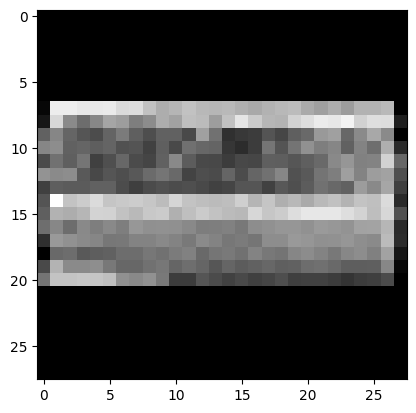

8


In [50]:
# DataLoader를 통해 iterate
train_features, train_labels = next(iter(train_dataloader))
print(train_features.size())
print(train_labels.size())
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap = 'gray')
plt.show()
print(label.item())